In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_bc = pd.read_csv('breast-cancer-data.csv')

In [3]:
df_bc.shape

(569, 32)

In [4]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
df_bc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#Checking missing values
df_bc.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
#Observation: 
## There are no mising values
## diagnosis column is the categorical field which says whether the dignosis is malignant (M) or benign (B)
# total 32 columns, but id colum can be drop that makes it to 31 columns including the target variable = 'Diagnosis


In [8]:
#dropping the id col

df_bc.drop(['id'],axis=1,inplace=True)

In [9]:
df_bc.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [10]:
df_bc.shape

(569, 31)

In [11]:
# checking how many malignant or benign in the dataset
df_bc['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
df_bc['diagnosis'].value_counts()/df_bc.shape[0]

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

# Observation: we have good split of the diagnosis in the data sets 
### 63% benign
### 37 % malignant

In [14]:
# Converting the diagnosis in to column 1/0 using one hot encoding


df_bc = pd.get_dummies(columns=['diagnosis'], data=df_bc,drop_first=True)



In [15]:
df_bc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_M
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [16]:
df_bc['diagnosis_M'].unique()

array([1, 0], dtype=uint64)

In [17]:
df_bc.shape

(569, 31)

In [21]:
df_bc.rename(columns={'diagnosis_M':'target'},inplace=True)

In [22]:
df_bc.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


<function matplotlib.pyplot.show(*args, **kw)>

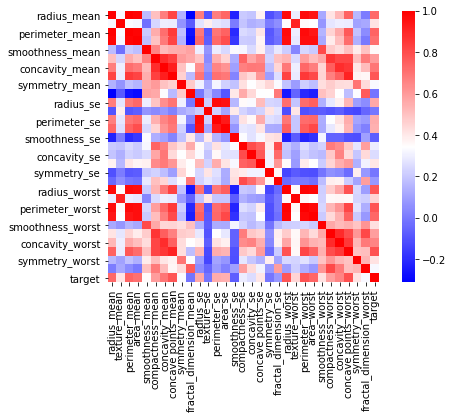

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(df_bc.corr(),square=True, cmap='bwr')
plt.show

## Observations: from the chart we  do see that there are quite a few variables which seems to have a high correlation among them.

In [28]:
X = df_bc.drop(['target'],axis=1)
y = df_bc['target']

In [33]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [26]:
#Scaling the data so that each feature has a single unit variance
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [75]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [76]:
X_scaled = scaler.transform(X)

In [77]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,train_size=0.7, random_state=42)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [79]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(398, 30)
(171, 30)
(398,)
(171,)


In [83]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [84]:
y_pred[0:10]

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=uint8)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [85]:
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9824561403508771
[[106   1]
 [  2  62]]


In [54]:
# without any feature enginerrin we get the acuracy of 98%

## PCA with 2 components

In [55]:
#Transform this data to its first 2 principal components.

In [119]:
from sklearn.decomposition import PCA
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)

X_scaled_pca_2 = pca_2.transform(X_scaled)

X_scaled_pca_2.shape

(569, 2)

In [120]:
X_scaled_pca_2

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

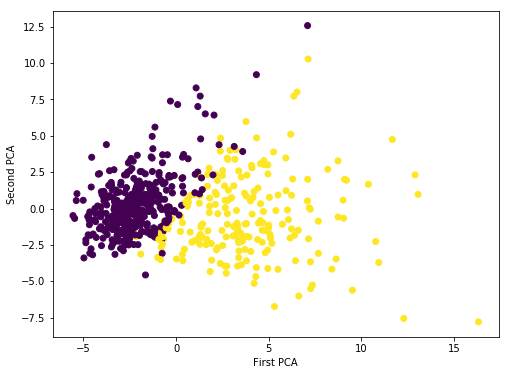

In [121]:
# Plot the two dimensions.
plt.figure(figsize=(8,6))
plt.scatter(X_scaled_pca_2[:,0],X_scaled_pca_2[:,1],c=y,cmap='viridis')
plt.xlabel('First PCA')
plt.ylabel('Second PCA')
plt.show()

In [113]:
#Print the explained variance.
print(pca_2.explained_variance_)
print(pca_2.explained_variance_ratio_)

[13.30499079  5.7013746 ]
[0.44272026 0.18971182]


In [ ]:
#Modelling with 2 PCA

In [122]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_scaled_pca_2, y, train_size=0.7, random_state=42)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [123]:
print(X_train_pca.shape)
print(X_test_pca.shape)
print(y_train_pca.shape)
print(y_test_pca.shape)

(398, 2)
(171, 2)
(398,)
(171,)


In [124]:
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = lr_pca.predict(X_test_pca)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [125]:
print(accuracy_score(y_pred_pca,y_test_pca))

0.9707602339181286


## PCA with 3 components

In [126]:
## PCA with 3 components

pca_3 = PCA(n_components=3)
pca_3.fit(X_scaled)

X_scaled_pca_3 = pca_3.transform(X_scaled)

X_scaled_pca_3.shape

(569, 3)

In [127]:
X_scaled_pca_3

array([[ 9.19283683,  1.94858307, -1.12316571],
       [ 2.3878018 , -3.76817174, -0.52929237],
       [ 5.73389628, -1.0751738 , -0.55174764],
       ...,
       [ 1.25617928, -1.90229671,  0.56273032],
       [10.37479406,  1.6720101 , -1.87702938],
       [-5.4752433 , -0.67063679,  1.4904437 ]])

In [128]:
#Print the explained variance.
print(pca_3.explained_variance_)
print(pca_3.explained_variance_ratio_)

[13.30499079  5.7013746   2.82291015]
[0.44272026 0.18971182 0.09393163]


In [129]:
## Modelling with 3 PCA

In [130]:
X_train_pca_3, X_test_pca_3, y_train_pca_3, y_test_pca_3 = train_test_split(X_scaled_pca_3, y, train_size=0.7, random_state=42)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [131]:
lr_pca_3 = LogisticRegression()
lr_pca_3.fit(X_train_pca_3, y_train_pca_3)
y_pred_pca_3 = lr_pca_3.predict(X_test_pca_3)

C:\Users\SujitSonar\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [132]:
accuracy_score(y_pred_pca_3, y_test_pca_3)

0.9707602339181286

In [134]:
# Observation: accuracy score from PCA 2 and PCA 3 has no change and accuracy score (97%) is slighly low 
#compared to accuracy score without any PCA ( 98%)